In [1]:
# Installing `caer` and `canaro` since they don't come pre-installed
!pip install --upgrade caer canaro

     |████████████████████████████████| 838 kB 3.0 MB/s eta 0:00:01
     |████████████████████████████████| 56.3 MB 62.8 MB/s eta 0:00:01
     |████████████████████████████████| 21.6 MB 33.6 MB/s eta 0:00:01
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [2]:
import os
import caer
import canaro
import numpy as np
import cv2 as cv
import gc
#pylint:disable=no-member (Removes linting problems with cv)

In [4]:
IMG_SIZE = (80,80)
channels = 1
char_path = r'../input/the-simpsons-characters-dataset/simpsons_dataset'

In [5]:
# Creating a character dictionary, sorting it in descending order
char_dict = {}
for char in os.listdir(char_path):
    char_dict[char] = len(os.listdir(os.path.join(char_path,char)))

# Sort in descending order
char_dict = caer.sort_dict(char_dict, descending=True)
char_dict  

[('homer_simpson', 2246),
 ('ned_flanders', 1454),
 ('moe_szyslak', 1452),
 ('lisa_simpson', 1354),
 ('bart_simpson', 1342),
 ('marge_simpson', 1291),
 ('krusty_the_clown', 1206),
 ('principal_skinner', 1194),
 ('charles_montgomery_burns', 1193),
 ('milhouse_van_houten', 1079),
 ('chief_wiggum', 986),
 ('abraham_grampa_simpson', 913),
 ('sideshow_bob', 877),
 ('apu_nahasapeemapetilon', 623),
 ('kent_brockman', 498),
 ('comic_book_guy', 469),
 ('edna_krabappel', 457),
 ('nelson_muntz', 358),
 ('lenny_leonard', 310),
 ('mayor_quimby', 246),
 ('waylon_smithers', 181),
 ('maggie_simpson', 128),
 ('groundskeeper_willie', 121),
 ('barney_gumble', 106),
 ('selma_bouvier', 103),
 ('carl_carlson', 98),
 ('ralph_wiggum', 89),
 ('patty_bouvier', 72),
 ('martin_prince', 71),
 ('professor_john_frink', 65),
 ('snake_jailbird', 55),
 ('cletus_spuckler', 47),
 ('rainier_wolfcastle', 45),
 ('simpsons_dataset', 42),
 ('agnes_skinner', 42),
 ('sideshow_mel', 40),
 ('otto_mann', 32),
 ('fat_tony', 27),
 (

In [6]:
#  Getting the first 10 categories with the most number of images
characters = []
count = 0
for i in char_dict:
    characters.append(i[0])
    count += 1
    if count >= 10:
        break
characters

['homer_simpson',
 'ned_flanders',
 'moe_szyslak',
 'lisa_simpson',
 'bart_simpson',
 'marge_simpson',
 'krusty_the_clown',
 'principal_skinner',
 'charles_montgomery_burns',
 'milhouse_van_houten']

In [7]:
# Create the training data
train = caer.preprocess_from_dir(char_path, characters, channels=channels, IMG_SIZE=IMG_SIZE, isShuffle=True)

[INFO] Could not find a file to load from. Generating the training data
----------------------------------------------
1 - homer_simpson
2 - homer_simpson
3 - homer_simpson
4 - homer_simpson
5 - homer_simpson
6 - homer_simpson
7 - homer_simpson
8 - homer_simpson
9 - homer_simpson
10 - homer_simpson
11 - homer_simpson
12 - homer_simpson
13 - homer_simpson
14 - homer_simpson
15 - homer_simpson
16 - homer_simpson
17 - homer_simpson
18 - homer_simpson
19 - homer_simpson
20 - homer_simpson
21 - homer_simpson
22 - homer_simpson
23 - homer_simpson
24 - homer_simpson
25 - homer_simpson
26 - homer_simpson
27 - homer_simpson
28 - homer_simpson
29 - homer_simpson
30 - homer_simpson
31 - homer_simpson
32 - homer_simpson
33 - homer_simpson
34 - homer_simpson
35 - homer_simpson
36 - homer_simpson
37 - homer_simpson
38 - homer_simpson
39 - homer_simpson
40 - homer_simpson
41 - homer_simpson
42 - homer_simpson
43 - homer_simpson
44 - homer_simpson
45 - homer_simpson
46 - homer_simpson
47 - homer_simps

411 - homer_simpson
412 - homer_simpson
413 - homer_simpson
414 - homer_simpson
415 - homer_simpson
416 - homer_simpson
417 - homer_simpson
418 - homer_simpson
419 - homer_simpson
420 - homer_simpson
421 - homer_simpson
422 - homer_simpson
423 - homer_simpson
424 - homer_simpson
425 - homer_simpson
426 - homer_simpson
427 - homer_simpson
428 - homer_simpson
429 - homer_simpson
430 - homer_simpson
431 - homer_simpson
432 - homer_simpson
433 - homer_simpson
434 - homer_simpson
435 - homer_simpson
436 - homer_simpson
437 - homer_simpson
438 - homer_simpson
439 - homer_simpson
440 - homer_simpson
441 - homer_simpson
442 - homer_simpson
443 - homer_simpson
444 - homer_simpson
445 - homer_simpson
446 - homer_simpson
447 - homer_simpson
448 - homer_simpson
449 - homer_simpson
450 - homer_simpson
451 - homer_simpson
452 - homer_simpson
453 - homer_simpson
454 - homer_simpson
455 - homer_simpson
456 - homer_simpson
457 - homer_simpson
458 - homer_simpson
459 - homer_simpson
460 - homer_simpson


835 - homer_simpson
836 - homer_simpson
837 - homer_simpson
838 - homer_simpson
839 - homer_simpson
840 - homer_simpson
841 - homer_simpson
842 - homer_simpson
843 - homer_simpson
844 - homer_simpson
845 - homer_simpson
846 - homer_simpson
847 - homer_simpson
848 - homer_simpson
849 - homer_simpson
850 - homer_simpson
851 - homer_simpson
852 - homer_simpson
853 - homer_simpson
854 - homer_simpson
855 - homer_simpson
856 - homer_simpson
857 - homer_simpson
858 - homer_simpson
859 - homer_simpson
860 - homer_simpson
861 - homer_simpson
862 - homer_simpson
863 - homer_simpson
864 - homer_simpson
865 - homer_simpson
866 - homer_simpson
867 - homer_simpson
868 - homer_simpson
869 - homer_simpson
870 - homer_simpson
871 - homer_simpson
872 - homer_simpson
873 - homer_simpson
874 - homer_simpson
875 - homer_simpson
876 - homer_simpson
877 - homer_simpson
878 - homer_simpson
879 - homer_simpson
880 - homer_simpson
881 - homer_simpson
882 - homer_simpson
883 - homer_simpson
884 - homer_simpson


1240 - homer_simpson
1241 - homer_simpson
1242 - homer_simpson
1243 - homer_simpson
1244 - homer_simpson
1245 - homer_simpson
1246 - homer_simpson
1247 - homer_simpson
1248 - homer_simpson
1249 - homer_simpson
1250 - homer_simpson
1251 - homer_simpson
1252 - homer_simpson
1253 - homer_simpson
1254 - homer_simpson
1255 - homer_simpson
1256 - homer_simpson
1257 - homer_simpson
1258 - homer_simpson
1259 - homer_simpson
1260 - homer_simpson
1261 - homer_simpson
1262 - homer_simpson
1263 - homer_simpson
1264 - homer_simpson
1265 - homer_simpson
1266 - homer_simpson
1267 - homer_simpson
1268 - homer_simpson
1269 - homer_simpson
1270 - homer_simpson
1271 - homer_simpson
1272 - homer_simpson
1273 - homer_simpson
1274 - homer_simpson
1275 - homer_simpson
1276 - homer_simpson
1277 - homer_simpson
1278 - homer_simpson
1279 - homer_simpson
1280 - homer_simpson
1281 - homer_simpson
1282 - homer_simpson
1283 - homer_simpson
1284 - homer_simpson
1285 - homer_simpson
1286 - homer_simpson
1287 - homer_

1640 - homer_simpson
1641 - homer_simpson
1642 - homer_simpson
1643 - homer_simpson
1644 - homer_simpson
1645 - homer_simpson
1646 - homer_simpson
1647 - homer_simpson
1648 - homer_simpson
1649 - homer_simpson
1650 - homer_simpson
1651 - homer_simpson
1652 - homer_simpson
1653 - homer_simpson
1654 - homer_simpson
1655 - homer_simpson
1656 - homer_simpson
1657 - homer_simpson
1658 - homer_simpson
1659 - homer_simpson
1660 - homer_simpson
1661 - homer_simpson
1662 - homer_simpson
1663 - homer_simpson
1664 - homer_simpson
1665 - homer_simpson
1666 - homer_simpson
1667 - homer_simpson
1668 - homer_simpson
1669 - homer_simpson
1670 - homer_simpson
1671 - homer_simpson
1672 - homer_simpson
1673 - homer_simpson
1674 - homer_simpson
1675 - homer_simpson
1676 - homer_simpson
1677 - homer_simpson
1678 - homer_simpson
1679 - homer_simpson
1680 - homer_simpson
1681 - homer_simpson
1682 - homer_simpson
1683 - homer_simpson
1684 - homer_simpson
1685 - homer_simpson
1686 - homer_simpson
1687 - homer_

2033 - homer_simpson
2034 - homer_simpson
2035 - homer_simpson
2036 - homer_simpson
2037 - homer_simpson
2038 - homer_simpson
2039 - homer_simpson
2040 - homer_simpson
2041 - homer_simpson
2042 - homer_simpson
2043 - homer_simpson
2044 - homer_simpson
2045 - homer_simpson
2046 - homer_simpson
2047 - homer_simpson
2048 - homer_simpson
2049 - homer_simpson
2050 - homer_simpson
2051 - homer_simpson
2052 - homer_simpson
2053 - homer_simpson
2054 - homer_simpson
2055 - homer_simpson
2056 - homer_simpson
2057 - homer_simpson
2058 - homer_simpson
2059 - homer_simpson
2060 - homer_simpson
2061 - homer_simpson
2062 - homer_simpson
2063 - homer_simpson
2064 - homer_simpson
2065 - homer_simpson
2066 - homer_simpson
2067 - homer_simpson
2068 - homer_simpson
2069 - homer_simpson
2070 - homer_simpson
2071 - homer_simpson
2072 - homer_simpson
2073 - homer_simpson
2074 - homer_simpson
2075 - homer_simpson
2076 - homer_simpson
2077 - homer_simpson
2078 - homer_simpson
2079 - homer_simpson
2080 - homer_

205 - ned_flanders
206 - ned_flanders
207 - ned_flanders
208 - ned_flanders
209 - ned_flanders
210 - ned_flanders
211 - ned_flanders
212 - ned_flanders
213 - ned_flanders
214 - ned_flanders
215 - ned_flanders
216 - ned_flanders
217 - ned_flanders
218 - ned_flanders
219 - ned_flanders
220 - ned_flanders
221 - ned_flanders
222 - ned_flanders
223 - ned_flanders
224 - ned_flanders
225 - ned_flanders
226 - ned_flanders
227 - ned_flanders
228 - ned_flanders
229 - ned_flanders
230 - ned_flanders
231 - ned_flanders
232 - ned_flanders
233 - ned_flanders
234 - ned_flanders
235 - ned_flanders
236 - ned_flanders
237 - ned_flanders
238 - ned_flanders
239 - ned_flanders
240 - ned_flanders
241 - ned_flanders
242 - ned_flanders
243 - ned_flanders
244 - ned_flanders
245 - ned_flanders
246 - ned_flanders
247 - ned_flanders
248 - ned_flanders
249 - ned_flanders
250 - ned_flanders
251 - ned_flanders
252 - ned_flanders
253 - ned_flanders
254 - ned_flanders
255 - ned_flanders
256 - ned_flanders
257 - ned_fl

644 - ned_flanders
645 - ned_flanders
646 - ned_flanders
647 - ned_flanders
648 - ned_flanders
649 - ned_flanders
650 - ned_flanders
651 - ned_flanders
652 - ned_flanders
653 - ned_flanders
654 - ned_flanders
655 - ned_flanders
656 - ned_flanders
657 - ned_flanders
658 - ned_flanders
659 - ned_flanders
660 - ned_flanders
661 - ned_flanders
662 - ned_flanders
663 - ned_flanders
664 - ned_flanders
665 - ned_flanders
666 - ned_flanders
667 - ned_flanders
668 - ned_flanders
669 - ned_flanders
670 - ned_flanders
671 - ned_flanders
672 - ned_flanders
673 - ned_flanders
674 - ned_flanders
675 - ned_flanders
676 - ned_flanders
677 - ned_flanders
678 - ned_flanders
679 - ned_flanders
680 - ned_flanders
681 - ned_flanders
682 - ned_flanders
683 - ned_flanders
684 - ned_flanders
685 - ned_flanders
686 - ned_flanders
687 - ned_flanders
688 - ned_flanders
689 - ned_flanders
690 - ned_flanders
691 - ned_flanders
692 - ned_flanders
693 - ned_flanders
694 - ned_flanders
695 - ned_flanders
696 - ned_fl

1076 - ned_flanders
1077 - ned_flanders
1078 - ned_flanders
1079 - ned_flanders
1080 - ned_flanders
1081 - ned_flanders
1082 - ned_flanders
1083 - ned_flanders
1084 - ned_flanders
1085 - ned_flanders
1086 - ned_flanders
1087 - ned_flanders
1088 - ned_flanders
1089 - ned_flanders
1090 - ned_flanders
1091 - ned_flanders
1092 - ned_flanders
1093 - ned_flanders
1094 - ned_flanders
1095 - ned_flanders
1096 - ned_flanders
1097 - ned_flanders
1098 - ned_flanders
1099 - ned_flanders
1100 - ned_flanders
1101 - ned_flanders
1102 - ned_flanders
1103 - ned_flanders
1104 - ned_flanders
1105 - ned_flanders
1106 - ned_flanders
1107 - ned_flanders
1108 - ned_flanders
1109 - ned_flanders
1110 - ned_flanders
1111 - ned_flanders
1112 - ned_flanders
1113 - ned_flanders
1114 - ned_flanders
1115 - ned_flanders
1116 - ned_flanders
1117 - ned_flanders
1118 - ned_flanders
1119 - ned_flanders
1120 - ned_flanders
1121 - ned_flanders
1122 - ned_flanders
1123 - ned_flanders
1124 - ned_flanders
1125 - ned_flanders


39 - moe_szyslak
40 - moe_szyslak
41 - moe_szyslak
42 - moe_szyslak
43 - moe_szyslak
44 - moe_szyslak
45 - moe_szyslak
46 - moe_szyslak
47 - moe_szyslak
48 - moe_szyslak
49 - moe_szyslak
50 - moe_szyslak
51 - moe_szyslak
52 - moe_szyslak
53 - moe_szyslak
54 - moe_szyslak
55 - moe_szyslak
56 - moe_szyslak
57 - moe_szyslak
58 - moe_szyslak
59 - moe_szyslak
60 - moe_szyslak
61 - moe_szyslak
62 - moe_szyslak
63 - moe_szyslak
64 - moe_szyslak
65 - moe_szyslak
66 - moe_szyslak
67 - moe_szyslak
68 - moe_szyslak
69 - moe_szyslak
70 - moe_szyslak
71 - moe_szyslak
72 - moe_szyslak
73 - moe_szyslak
74 - moe_szyslak
75 - moe_szyslak
76 - moe_szyslak
77 - moe_szyslak
78 - moe_szyslak
79 - moe_szyslak
80 - moe_szyslak
81 - moe_szyslak
82 - moe_szyslak
83 - moe_szyslak
84 - moe_szyslak
85 - moe_szyslak
86 - moe_szyslak
87 - moe_szyslak
88 - moe_szyslak
89 - moe_szyslak
90 - moe_szyslak
91 - moe_szyslak
92 - moe_szyslak
93 - moe_szyslak
94 - moe_szyslak
95 - moe_szyslak
96 - moe_szyslak
97 - moe_szysl

500 - moe_szyslak
501 - moe_szyslak
502 - moe_szyslak
503 - moe_szyslak
504 - moe_szyslak
505 - moe_szyslak
506 - moe_szyslak
507 - moe_szyslak
508 - moe_szyslak
509 - moe_szyslak
510 - moe_szyslak
511 - moe_szyslak
512 - moe_szyslak
513 - moe_szyslak
514 - moe_szyslak
515 - moe_szyslak
516 - moe_szyslak
517 - moe_szyslak
518 - moe_szyslak
519 - moe_szyslak
520 - moe_szyslak
521 - moe_szyslak
522 - moe_szyslak
523 - moe_szyslak
524 - moe_szyslak
525 - moe_szyslak
526 - moe_szyslak
527 - moe_szyslak
528 - moe_szyslak
529 - moe_szyslak
530 - moe_szyslak
531 - moe_szyslak
532 - moe_szyslak
533 - moe_szyslak
534 - moe_szyslak
535 - moe_szyslak
536 - moe_szyslak
537 - moe_szyslak
538 - moe_szyslak
539 - moe_szyslak
540 - moe_szyslak
541 - moe_szyslak
542 - moe_szyslak
543 - moe_szyslak
544 - moe_szyslak
545 - moe_szyslak
546 - moe_szyslak
547 - moe_szyslak
548 - moe_szyslak
549 - moe_szyslak
550 - moe_szyslak
551 - moe_szyslak
552 - moe_szyslak
553 - moe_szyslak
554 - moe_szyslak
555 - moe_

965 - moe_szyslak
966 - moe_szyslak
967 - moe_szyslak
968 - moe_szyslak
969 - moe_szyslak
970 - moe_szyslak
971 - moe_szyslak
972 - moe_szyslak
973 - moe_szyslak
974 - moe_szyslak
975 - moe_szyslak
976 - moe_szyslak
977 - moe_szyslak
978 - moe_szyslak
979 - moe_szyslak
980 - moe_szyslak
981 - moe_szyslak
982 - moe_szyslak
983 - moe_szyslak
984 - moe_szyslak
985 - moe_szyslak
986 - moe_szyslak
987 - moe_szyslak
988 - moe_szyslak
989 - moe_szyslak
990 - moe_szyslak
991 - moe_szyslak
992 - moe_szyslak
993 - moe_szyslak
994 - moe_szyslak
995 - moe_szyslak
996 - moe_szyslak
997 - moe_szyslak
998 - moe_szyslak
999 - moe_szyslak
1000 - moe_szyslak
1001 - moe_szyslak
1002 - moe_szyslak
1003 - moe_szyslak
1004 - moe_szyslak
1005 - moe_szyslak
1006 - moe_szyslak
1007 - moe_szyslak
1008 - moe_szyslak
1009 - moe_szyslak
1010 - moe_szyslak
1011 - moe_szyslak
1012 - moe_szyslak
1013 - moe_szyslak
1014 - moe_szyslak
1015 - moe_szyslak
1016 - moe_szyslak
1017 - moe_szyslak
1018 - moe_szyslak
1019 - mo

1412 - moe_szyslak
1413 - moe_szyslak
1414 - moe_szyslak
1415 - moe_szyslak
1416 - moe_szyslak
1417 - moe_szyslak
1418 - moe_szyslak
1419 - moe_szyslak
1420 - moe_szyslak
1421 - moe_szyslak
1422 - moe_szyslak
1423 - moe_szyslak
1424 - moe_szyslak
1425 - moe_szyslak
1426 - moe_szyslak
1427 - moe_szyslak
1428 - moe_szyslak
1429 - moe_szyslak
1430 - moe_szyslak
1431 - moe_szyslak
1432 - moe_szyslak
1433 - moe_szyslak
1434 - moe_szyslak
1435 - moe_szyslak
1436 - moe_szyslak
1437 - moe_szyslak
1438 - moe_szyslak
1439 - moe_szyslak
1440 - moe_szyslak
1441 - moe_szyslak
1442 - moe_szyslak
1443 - moe_szyslak
1444 - moe_szyslak
1445 - moe_szyslak
1446 - moe_szyslak
1447 - moe_szyslak
1448 - moe_szyslak
1449 - moe_szyslak
1450 - moe_szyslak
1451 - moe_szyslak
1452 - moe_szyslak
1 - lisa_simpson
2 - lisa_simpson
3 - lisa_simpson
4 - lisa_simpson
5 - lisa_simpson
6 - lisa_simpson
7 - lisa_simpson
8 - lisa_simpson
9 - lisa_simpson
10 - lisa_simpson
11 - lisa_simpson
12 - lisa_simpson
13 - lisa_simp

402 - lisa_simpson
403 - lisa_simpson
404 - lisa_simpson
405 - lisa_simpson
406 - lisa_simpson
407 - lisa_simpson
408 - lisa_simpson
409 - lisa_simpson
410 - lisa_simpson
411 - lisa_simpson
412 - lisa_simpson
413 - lisa_simpson
414 - lisa_simpson
415 - lisa_simpson
416 - lisa_simpson
417 - lisa_simpson
418 - lisa_simpson
419 - lisa_simpson
420 - lisa_simpson
421 - lisa_simpson
422 - lisa_simpson
423 - lisa_simpson
424 - lisa_simpson
425 - lisa_simpson
426 - lisa_simpson
427 - lisa_simpson
428 - lisa_simpson
429 - lisa_simpson
430 - lisa_simpson
431 - lisa_simpson
432 - lisa_simpson
433 - lisa_simpson
434 - lisa_simpson
435 - lisa_simpson
436 - lisa_simpson
437 - lisa_simpson
438 - lisa_simpson
439 - lisa_simpson
440 - lisa_simpson
441 - lisa_simpson
442 - lisa_simpson
443 - lisa_simpson
444 - lisa_simpson
445 - lisa_simpson
446 - lisa_simpson
447 - lisa_simpson
448 - lisa_simpson
449 - lisa_simpson
450 - lisa_simpson
451 - lisa_simpson
452 - lisa_simpson
453 - lisa_simpson
454 - lisa_s

838 - lisa_simpson
839 - lisa_simpson
840 - lisa_simpson
841 - lisa_simpson
842 - lisa_simpson
843 - lisa_simpson
844 - lisa_simpson
845 - lisa_simpson
846 - lisa_simpson
847 - lisa_simpson
848 - lisa_simpson
849 - lisa_simpson
850 - lisa_simpson
851 - lisa_simpson
852 - lisa_simpson
853 - lisa_simpson
854 - lisa_simpson
855 - lisa_simpson
856 - lisa_simpson
857 - lisa_simpson
858 - lisa_simpson
859 - lisa_simpson
860 - lisa_simpson
861 - lisa_simpson
862 - lisa_simpson
863 - lisa_simpson
864 - lisa_simpson
865 - lisa_simpson
866 - lisa_simpson
867 - lisa_simpson
868 - lisa_simpson
869 - lisa_simpson
870 - lisa_simpson
871 - lisa_simpson
872 - lisa_simpson
873 - lisa_simpson
874 - lisa_simpson
875 - lisa_simpson
876 - lisa_simpson
877 - lisa_simpson
878 - lisa_simpson
879 - lisa_simpson
880 - lisa_simpson
881 - lisa_simpson
882 - lisa_simpson
883 - lisa_simpson
884 - lisa_simpson
885 - lisa_simpson
886 - lisa_simpson
887 - lisa_simpson
888 - lisa_simpson
889 - lisa_simpson
890 - lisa_s

1258 - lisa_simpson
1259 - lisa_simpson
1260 - lisa_simpson
1261 - lisa_simpson
1262 - lisa_simpson
1263 - lisa_simpson
1264 - lisa_simpson
1265 - lisa_simpson
1266 - lisa_simpson
1267 - lisa_simpson
1268 - lisa_simpson
1269 - lisa_simpson
1270 - lisa_simpson
1271 - lisa_simpson
1272 - lisa_simpson
1273 - lisa_simpson
1274 - lisa_simpson
1275 - lisa_simpson
1276 - lisa_simpson
1277 - lisa_simpson
1278 - lisa_simpson
1279 - lisa_simpson
1280 - lisa_simpson
1281 - lisa_simpson
1282 - lisa_simpson
1283 - lisa_simpson
1284 - lisa_simpson
1285 - lisa_simpson
1286 - lisa_simpson
1287 - lisa_simpson
1288 - lisa_simpson
1289 - lisa_simpson
1290 - lisa_simpson
1291 - lisa_simpson
1292 - lisa_simpson
1293 - lisa_simpson
1294 - lisa_simpson
1295 - lisa_simpson
1296 - lisa_simpson
1297 - lisa_simpson
1298 - lisa_simpson
1299 - lisa_simpson
1300 - lisa_simpson
1301 - lisa_simpson
1302 - lisa_simpson
1303 - lisa_simpson
1304 - lisa_simpson
1305 - lisa_simpson
1306 - lisa_simpson
1307 - lisa_simpson


354 - bart_simpson
355 - bart_simpson
356 - bart_simpson
357 - bart_simpson
358 - bart_simpson
359 - bart_simpson
360 - bart_simpson
361 - bart_simpson
362 - bart_simpson
363 - bart_simpson
364 - bart_simpson
365 - bart_simpson
366 - bart_simpson
367 - bart_simpson
368 - bart_simpson
369 - bart_simpson
370 - bart_simpson
371 - bart_simpson
372 - bart_simpson
373 - bart_simpson
374 - bart_simpson
375 - bart_simpson
376 - bart_simpson
377 - bart_simpson
378 - bart_simpson
379 - bart_simpson
380 - bart_simpson
381 - bart_simpson
382 - bart_simpson
383 - bart_simpson
384 - bart_simpson
385 - bart_simpson
386 - bart_simpson
387 - bart_simpson
388 - bart_simpson
389 - bart_simpson
390 - bart_simpson
391 - bart_simpson
392 - bart_simpson
393 - bart_simpson
394 - bart_simpson
395 - bart_simpson
396 - bart_simpson
397 - bart_simpson
398 - bart_simpson
399 - bart_simpson
400 - bart_simpson
401 - bart_simpson
402 - bart_simpson
403 - bart_simpson
404 - bart_simpson
405 - bart_simpson
406 - bart_s

795 - bart_simpson
796 - bart_simpson
797 - bart_simpson
798 - bart_simpson
799 - bart_simpson
800 - bart_simpson
801 - bart_simpson
802 - bart_simpson
803 - bart_simpson
804 - bart_simpson
805 - bart_simpson
806 - bart_simpson
807 - bart_simpson
808 - bart_simpson
809 - bart_simpson
810 - bart_simpson
811 - bart_simpson
812 - bart_simpson
813 - bart_simpson
814 - bart_simpson
815 - bart_simpson
816 - bart_simpson
817 - bart_simpson
818 - bart_simpson
819 - bart_simpson
820 - bart_simpson
821 - bart_simpson
822 - bart_simpson
823 - bart_simpson
824 - bart_simpson
825 - bart_simpson
826 - bart_simpson
827 - bart_simpson
828 - bart_simpson
829 - bart_simpson
830 - bart_simpson
831 - bart_simpson
832 - bart_simpson
833 - bart_simpson
834 - bart_simpson
835 - bart_simpson
836 - bart_simpson
837 - bart_simpson
838 - bart_simpson
839 - bart_simpson
840 - bart_simpson
841 - bart_simpson
842 - bart_simpson
843 - bart_simpson
844 - bart_simpson
845 - bart_simpson
846 - bart_simpson
847 - bart_s

1221 - bart_simpson
1222 - bart_simpson
1223 - bart_simpson
1224 - bart_simpson
1225 - bart_simpson
1226 - bart_simpson
1227 - bart_simpson
1228 - bart_simpson
1229 - bart_simpson
1230 - bart_simpson
1231 - bart_simpson
1232 - bart_simpson
1233 - bart_simpson
1234 - bart_simpson
1235 - bart_simpson
1236 - bart_simpson
1237 - bart_simpson
1238 - bart_simpson
1239 - bart_simpson
1240 - bart_simpson
1241 - bart_simpson
1242 - bart_simpson
1243 - bart_simpson
1244 - bart_simpson
1245 - bart_simpson
1246 - bart_simpson
1247 - bart_simpson
1248 - bart_simpson
1249 - bart_simpson
1250 - bart_simpson
1251 - bart_simpson
1252 - bart_simpson
1253 - bart_simpson
1254 - bart_simpson
1255 - bart_simpson
1256 - bart_simpson
1257 - bart_simpson
1258 - bart_simpson
1259 - bart_simpson
1260 - bart_simpson
1261 - bart_simpson
1262 - bart_simpson
1263 - bart_simpson
1264 - bart_simpson
1265 - bart_simpson
1266 - bart_simpson
1267 - bart_simpson
1268 - bart_simpson
1269 - bart_simpson
1270 - bart_simpson


303 - marge_simpson
304 - marge_simpson
305 - marge_simpson
306 - marge_simpson
307 - marge_simpson
308 - marge_simpson
309 - marge_simpson
310 - marge_simpson
311 - marge_simpson
312 - marge_simpson
313 - marge_simpson
314 - marge_simpson
315 - marge_simpson
316 - marge_simpson
317 - marge_simpson
318 - marge_simpson
319 - marge_simpson
320 - marge_simpson
321 - marge_simpson
322 - marge_simpson
323 - marge_simpson
324 - marge_simpson
325 - marge_simpson
326 - marge_simpson
327 - marge_simpson
328 - marge_simpson
329 - marge_simpson
330 - marge_simpson
331 - marge_simpson
332 - marge_simpson
333 - marge_simpson
334 - marge_simpson
335 - marge_simpson
336 - marge_simpson
337 - marge_simpson
338 - marge_simpson
339 - marge_simpson
340 - marge_simpson
341 - marge_simpson
342 - marge_simpson
343 - marge_simpson
344 - marge_simpson
345 - marge_simpson
346 - marge_simpson
347 - marge_simpson
348 - marge_simpson
349 - marge_simpson
350 - marge_simpson
351 - marge_simpson
352 - marge_simpson


724 - marge_simpson
725 - marge_simpson
726 - marge_simpson
727 - marge_simpson
728 - marge_simpson
729 - marge_simpson
730 - marge_simpson
731 - marge_simpson
732 - marge_simpson
733 - marge_simpson
734 - marge_simpson
735 - marge_simpson
736 - marge_simpson
737 - marge_simpson
738 - marge_simpson
739 - marge_simpson
740 - marge_simpson
741 - marge_simpson
742 - marge_simpson
743 - marge_simpson
744 - marge_simpson
745 - marge_simpson
746 - marge_simpson
747 - marge_simpson
748 - marge_simpson
749 - marge_simpson
750 - marge_simpson
751 - marge_simpson
752 - marge_simpson
753 - marge_simpson
754 - marge_simpson
755 - marge_simpson
756 - marge_simpson
757 - marge_simpson
758 - marge_simpson
759 - marge_simpson
760 - marge_simpson
761 - marge_simpson
762 - marge_simpson
763 - marge_simpson
764 - marge_simpson
765 - marge_simpson
766 - marge_simpson
767 - marge_simpson
768 - marge_simpson
769 - marge_simpson
770 - marge_simpson
771 - marge_simpson
772 - marge_simpson
773 - marge_simpson


1128 - marge_simpson
1129 - marge_simpson
1130 - marge_simpson
1131 - marge_simpson
1132 - marge_simpson
1133 - marge_simpson
1134 - marge_simpson
1135 - marge_simpson
1136 - marge_simpson
1137 - marge_simpson
1138 - marge_simpson
1139 - marge_simpson
1140 - marge_simpson
1141 - marge_simpson
1142 - marge_simpson
1143 - marge_simpson
1144 - marge_simpson
1145 - marge_simpson
1146 - marge_simpson
1147 - marge_simpson
1148 - marge_simpson
1149 - marge_simpson
1150 - marge_simpson
1151 - marge_simpson
1152 - marge_simpson
1153 - marge_simpson
1154 - marge_simpson
1155 - marge_simpson
1156 - marge_simpson
1157 - marge_simpson
1158 - marge_simpson
1159 - marge_simpson
1160 - marge_simpson
1161 - marge_simpson
1162 - marge_simpson
1163 - marge_simpson
1164 - marge_simpson
1165 - marge_simpson
1166 - marge_simpson
1167 - marge_simpson
1168 - marge_simpson
1169 - marge_simpson
1170 - marge_simpson
1171 - marge_simpson
1172 - marge_simpson
1173 - marge_simpson
1174 - marge_simpson
1175 - marge_

226 - krusty_the_clown
227 - krusty_the_clown
228 - krusty_the_clown
229 - krusty_the_clown
230 - krusty_the_clown
231 - krusty_the_clown
232 - krusty_the_clown
233 - krusty_the_clown
234 - krusty_the_clown
235 - krusty_the_clown
236 - krusty_the_clown
237 - krusty_the_clown
238 - krusty_the_clown
239 - krusty_the_clown
240 - krusty_the_clown
241 - krusty_the_clown
242 - krusty_the_clown
243 - krusty_the_clown
244 - krusty_the_clown
245 - krusty_the_clown
246 - krusty_the_clown
247 - krusty_the_clown
248 - krusty_the_clown
249 - krusty_the_clown
250 - krusty_the_clown
251 - krusty_the_clown
252 - krusty_the_clown
253 - krusty_the_clown
254 - krusty_the_clown
255 - krusty_the_clown
256 - krusty_the_clown
257 - krusty_the_clown
258 - krusty_the_clown
259 - krusty_the_clown
260 - krusty_the_clown
261 - krusty_the_clown
262 - krusty_the_clown
263 - krusty_the_clown
264 - krusty_the_clown
265 - krusty_the_clown
266 - krusty_the_clown
267 - krusty_the_clown
268 - krusty_the_clown
269 - krust

602 - krusty_the_clown
603 - krusty_the_clown
604 - krusty_the_clown
605 - krusty_the_clown
606 - krusty_the_clown
607 - krusty_the_clown
608 - krusty_the_clown
609 - krusty_the_clown
610 - krusty_the_clown
611 - krusty_the_clown
612 - krusty_the_clown
613 - krusty_the_clown
614 - krusty_the_clown
615 - krusty_the_clown
616 - krusty_the_clown
617 - krusty_the_clown
618 - krusty_the_clown
619 - krusty_the_clown
620 - krusty_the_clown
621 - krusty_the_clown
622 - krusty_the_clown
623 - krusty_the_clown
624 - krusty_the_clown
625 - krusty_the_clown
626 - krusty_the_clown
627 - krusty_the_clown
628 - krusty_the_clown
629 - krusty_the_clown
630 - krusty_the_clown
631 - krusty_the_clown
632 - krusty_the_clown
633 - krusty_the_clown
634 - krusty_the_clown
635 - krusty_the_clown
636 - krusty_the_clown
637 - krusty_the_clown
638 - krusty_the_clown
639 - krusty_the_clown
640 - krusty_the_clown
641 - krusty_the_clown
642 - krusty_the_clown
643 - krusty_the_clown
644 - krusty_the_clown
645 - krust

969 - krusty_the_clown
970 - krusty_the_clown
971 - krusty_the_clown
972 - krusty_the_clown
973 - krusty_the_clown
974 - krusty_the_clown
975 - krusty_the_clown
976 - krusty_the_clown
977 - krusty_the_clown
978 - krusty_the_clown
979 - krusty_the_clown
980 - krusty_the_clown
981 - krusty_the_clown
982 - krusty_the_clown
983 - krusty_the_clown
984 - krusty_the_clown
985 - krusty_the_clown
986 - krusty_the_clown
987 - krusty_the_clown
988 - krusty_the_clown
989 - krusty_the_clown
990 - krusty_the_clown
991 - krusty_the_clown
992 - krusty_the_clown
993 - krusty_the_clown
994 - krusty_the_clown
995 - krusty_the_clown
996 - krusty_the_clown
997 - krusty_the_clown
998 - krusty_the_clown
999 - krusty_the_clown
1000 - krusty_the_clown
1001 - krusty_the_clown
1002 - krusty_the_clown
1003 - krusty_the_clown
1004 - krusty_the_clown
1005 - krusty_the_clown
1006 - krusty_the_clown
1007 - krusty_the_clown
1008 - krusty_the_clown
1009 - krusty_the_clown
1010 - krusty_the_clown
1011 - krusty_the_clown

116 - principal_skinner
117 - principal_skinner
118 - principal_skinner
119 - principal_skinner
120 - principal_skinner
121 - principal_skinner
122 - principal_skinner
123 - principal_skinner
124 - principal_skinner
125 - principal_skinner
126 - principal_skinner
127 - principal_skinner
128 - principal_skinner
129 - principal_skinner
130 - principal_skinner
131 - principal_skinner
132 - principal_skinner
133 - principal_skinner
134 - principal_skinner
135 - principal_skinner
136 - principal_skinner
137 - principal_skinner
138 - principal_skinner
139 - principal_skinner
140 - principal_skinner
141 - principal_skinner
142 - principal_skinner
143 - principal_skinner
144 - principal_skinner
145 - principal_skinner
146 - principal_skinner
147 - principal_skinner
148 - principal_skinner
149 - principal_skinner
150 - principal_skinner
151 - principal_skinner
152 - principal_skinner
153 - principal_skinner
154 - principal_skinner
155 - principal_skinner
156 - principal_skinner
157 - principal_

474 - principal_skinner
475 - principal_skinner
476 - principal_skinner
477 - principal_skinner
478 - principal_skinner
479 - principal_skinner
480 - principal_skinner
481 - principal_skinner
482 - principal_skinner
483 - principal_skinner
484 - principal_skinner
485 - principal_skinner
486 - principal_skinner
487 - principal_skinner
488 - principal_skinner
489 - principal_skinner
490 - principal_skinner
491 - principal_skinner
492 - principal_skinner
493 - principal_skinner
494 - principal_skinner
495 - principal_skinner
496 - principal_skinner
497 - principal_skinner
498 - principal_skinner
499 - principal_skinner
500 - principal_skinner
501 - principal_skinner
502 - principal_skinner
503 - principal_skinner
504 - principal_skinner
505 - principal_skinner
506 - principal_skinner
507 - principal_skinner
508 - principal_skinner
509 - principal_skinner
510 - principal_skinner
511 - principal_skinner
512 - principal_skinner
513 - principal_skinner
514 - principal_skinner
515 - principal_

821 - principal_skinner
822 - principal_skinner
823 - principal_skinner
824 - principal_skinner
825 - principal_skinner
826 - principal_skinner
827 - principal_skinner
828 - principal_skinner
829 - principal_skinner
830 - principal_skinner
831 - principal_skinner
832 - principal_skinner
833 - principal_skinner
834 - principal_skinner
835 - principal_skinner
836 - principal_skinner
837 - principal_skinner
838 - principal_skinner
839 - principal_skinner
840 - principal_skinner
841 - principal_skinner
842 - principal_skinner
843 - principal_skinner
844 - principal_skinner
845 - principal_skinner
846 - principal_skinner
847 - principal_skinner
848 - principal_skinner
849 - principal_skinner
850 - principal_skinner
851 - principal_skinner
852 - principal_skinner
853 - principal_skinner
854 - principal_skinner
855 - principal_skinner
856 - principal_skinner
857 - principal_skinner
858 - principal_skinner
859 - principal_skinner
860 - principal_skinner
861 - principal_skinner
862 - principal_

1162 - principal_skinner
1163 - principal_skinner
1164 - principal_skinner
1165 - principal_skinner
1166 - principal_skinner
1167 - principal_skinner
1168 - principal_skinner
1169 - principal_skinner
1170 - principal_skinner
1171 - principal_skinner
1172 - principal_skinner
1173 - principal_skinner
1174 - principal_skinner
1175 - principal_skinner
1176 - principal_skinner
1177 - principal_skinner
1178 - principal_skinner
1179 - principal_skinner
1180 - principal_skinner
1181 - principal_skinner
1182 - principal_skinner
1183 - principal_skinner
1184 - principal_skinner
1185 - principal_skinner
1186 - principal_skinner
1187 - principal_skinner
1188 - principal_skinner
1189 - principal_skinner
1190 - principal_skinner
1191 - principal_skinner
1192 - principal_skinner
1193 - principal_skinner
1194 - principal_skinner
1 - charles_montgomery_burns
2 - charles_montgomery_burns
3 - charles_montgomery_burns
4 - charles_montgomery_burns
5 - charles_montgomery_burns
6 - charles_montgomery_burns
7

250 - charles_montgomery_burns
251 - charles_montgomery_burns
252 - charles_montgomery_burns
253 - charles_montgomery_burns
254 - charles_montgomery_burns
255 - charles_montgomery_burns
256 - charles_montgomery_burns
257 - charles_montgomery_burns
258 - charles_montgomery_burns
259 - charles_montgomery_burns
260 - charles_montgomery_burns
261 - charles_montgomery_burns
262 - charles_montgomery_burns
263 - charles_montgomery_burns
264 - charles_montgomery_burns
265 - charles_montgomery_burns
266 - charles_montgomery_burns
267 - charles_montgomery_burns
268 - charles_montgomery_burns
269 - charles_montgomery_burns
270 - charles_montgomery_burns
271 - charles_montgomery_burns
272 - charles_montgomery_burns
273 - charles_montgomery_burns
274 - charles_montgomery_burns
275 - charles_montgomery_burns
276 - charles_montgomery_burns
277 - charles_montgomery_burns
278 - charles_montgomery_burns
279 - charles_montgomery_burns
280 - charles_montgomery_burns
281 - charles_montgomery_burns
282 - ch

515 - charles_montgomery_burns
516 - charles_montgomery_burns
517 - charles_montgomery_burns
518 - charles_montgomery_burns
519 - charles_montgomery_burns
520 - charles_montgomery_burns
521 - charles_montgomery_burns
522 - charles_montgomery_burns
523 - charles_montgomery_burns
524 - charles_montgomery_burns
525 - charles_montgomery_burns
526 - charles_montgomery_burns
527 - charles_montgomery_burns
528 - charles_montgomery_burns
529 - charles_montgomery_burns
530 - charles_montgomery_burns
531 - charles_montgomery_burns
532 - charles_montgomery_burns
533 - charles_montgomery_burns
534 - charles_montgomery_burns
535 - charles_montgomery_burns
536 - charles_montgomery_burns
537 - charles_montgomery_burns
538 - charles_montgomery_burns
539 - charles_montgomery_burns
540 - charles_montgomery_burns
541 - charles_montgomery_burns
542 - charles_montgomery_burns
543 - charles_montgomery_burns
544 - charles_montgomery_burns
545 - charles_montgomery_burns
546 - charles_montgomery_burns
547 - ch

792 - charles_montgomery_burns
793 - charles_montgomery_burns
794 - charles_montgomery_burns
795 - charles_montgomery_burns
796 - charles_montgomery_burns
797 - charles_montgomery_burns
798 - charles_montgomery_burns
799 - charles_montgomery_burns
800 - charles_montgomery_burns
801 - charles_montgomery_burns
802 - charles_montgomery_burns
803 - charles_montgomery_burns
804 - charles_montgomery_burns
805 - charles_montgomery_burns
806 - charles_montgomery_burns
807 - charles_montgomery_burns
808 - charles_montgomery_burns
809 - charles_montgomery_burns
810 - charles_montgomery_burns
811 - charles_montgomery_burns
812 - charles_montgomery_burns
813 - charles_montgomery_burns
814 - charles_montgomery_burns
815 - charles_montgomery_burns
816 - charles_montgomery_burns
817 - charles_montgomery_burns
818 - charles_montgomery_burns
819 - charles_montgomery_burns
820 - charles_montgomery_burns
821 - charles_montgomery_burns
822 - charles_montgomery_burns
823 - charles_montgomery_burns
824 - ch

1074 - charles_montgomery_burns
1075 - charles_montgomery_burns
1076 - charles_montgomery_burns
1077 - charles_montgomery_burns
1078 - charles_montgomery_burns
1079 - charles_montgomery_burns
1080 - charles_montgomery_burns
1081 - charles_montgomery_burns
1082 - charles_montgomery_burns
1083 - charles_montgomery_burns
1084 - charles_montgomery_burns
1085 - charles_montgomery_burns
1086 - charles_montgomery_burns
1087 - charles_montgomery_burns
1088 - charles_montgomery_burns
1089 - charles_montgomery_burns
1090 - charles_montgomery_burns
1091 - charles_montgomery_burns
1092 - charles_montgomery_burns
1093 - charles_montgomery_burns
1094 - charles_montgomery_burns
1095 - charles_montgomery_burns
1096 - charles_montgomery_burns
1097 - charles_montgomery_burns
1098 - charles_montgomery_burns
1099 - charles_montgomery_burns
1100 - charles_montgomery_burns
1101 - charles_montgomery_burns
1102 - charles_montgomery_burns
1103 - charles_montgomery_burns
1104 - charles_montgomery_burns
1105 - c

185 - milhouse_van_houten
186 - milhouse_van_houten
187 - milhouse_van_houten
188 - milhouse_van_houten
189 - milhouse_van_houten
190 - milhouse_van_houten
191 - milhouse_van_houten
192 - milhouse_van_houten
193 - milhouse_van_houten
194 - milhouse_van_houten
195 - milhouse_van_houten
196 - milhouse_van_houten
197 - milhouse_van_houten
198 - milhouse_van_houten
199 - milhouse_van_houten
200 - milhouse_van_houten
201 - milhouse_van_houten
202 - milhouse_van_houten
203 - milhouse_van_houten
204 - milhouse_van_houten
205 - milhouse_van_houten
206 - milhouse_van_houten
207 - milhouse_van_houten
208 - milhouse_van_houten
209 - milhouse_van_houten
210 - milhouse_van_houten
211 - milhouse_van_houten
212 - milhouse_van_houten
213 - milhouse_van_houten
214 - milhouse_van_houten
215 - milhouse_van_houten
216 - milhouse_van_houten
217 - milhouse_van_houten
218 - milhouse_van_houten
219 - milhouse_van_houten
220 - milhouse_van_houten
221 - milhouse_van_houten
222 - milhouse_van_houten
223 - milhou

506 - milhouse_van_houten
507 - milhouse_van_houten
508 - milhouse_van_houten
509 - milhouse_van_houten
510 - milhouse_van_houten
511 - milhouse_van_houten
512 - milhouse_van_houten
513 - milhouse_van_houten
514 - milhouse_van_houten
515 - milhouse_van_houten
516 - milhouse_van_houten
517 - milhouse_van_houten
518 - milhouse_van_houten
519 - milhouse_van_houten
520 - milhouse_van_houten
521 - milhouse_van_houten
522 - milhouse_van_houten
523 - milhouse_van_houten
524 - milhouse_van_houten
525 - milhouse_van_houten
526 - milhouse_van_houten
527 - milhouse_van_houten
528 - milhouse_van_houten
529 - milhouse_van_houten
530 - milhouse_van_houten
531 - milhouse_van_houten
532 - milhouse_van_houten
533 - milhouse_van_houten
534 - milhouse_van_houten
535 - milhouse_van_houten
536 - milhouse_van_houten
537 - milhouse_van_houten
538 - milhouse_van_houten
539 - milhouse_van_houten
540 - milhouse_van_houten
541 - milhouse_van_houten
542 - milhouse_van_houten
543 - milhouse_van_houten
544 - milhou

830 - milhouse_van_houten
831 - milhouse_van_houten
832 - milhouse_van_houten
833 - milhouse_van_houten
834 - milhouse_van_houten
835 - milhouse_van_houten
836 - milhouse_van_houten
837 - milhouse_van_houten
838 - milhouse_van_houten
839 - milhouse_van_houten
840 - milhouse_van_houten
841 - milhouse_van_houten
842 - milhouse_van_houten
843 - milhouse_van_houten
844 - milhouse_van_houten
845 - milhouse_van_houten
846 - milhouse_van_houten
847 - milhouse_van_houten
848 - milhouse_van_houten
849 - milhouse_van_houten
850 - milhouse_van_houten
851 - milhouse_van_houten
852 - milhouse_van_houten
853 - milhouse_van_houten
854 - milhouse_van_houten
855 - milhouse_van_houten
856 - milhouse_van_houten
857 - milhouse_van_houten
858 - milhouse_van_houten
859 - milhouse_van_houten
860 - milhouse_van_houten
861 - milhouse_van_houten
862 - milhouse_van_houten
863 - milhouse_van_houten
864 - milhouse_van_houten
865 - milhouse_van_houten
866 - milhouse_van_houten
867 - milhouse_van_houten
868 - milhou

/opt/conda/lib/python3.7/site-packages/caer/core.py:72: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(obj, dtype=dtype, order=order)


In [8]:
# Number of training samples
len(train)

13811

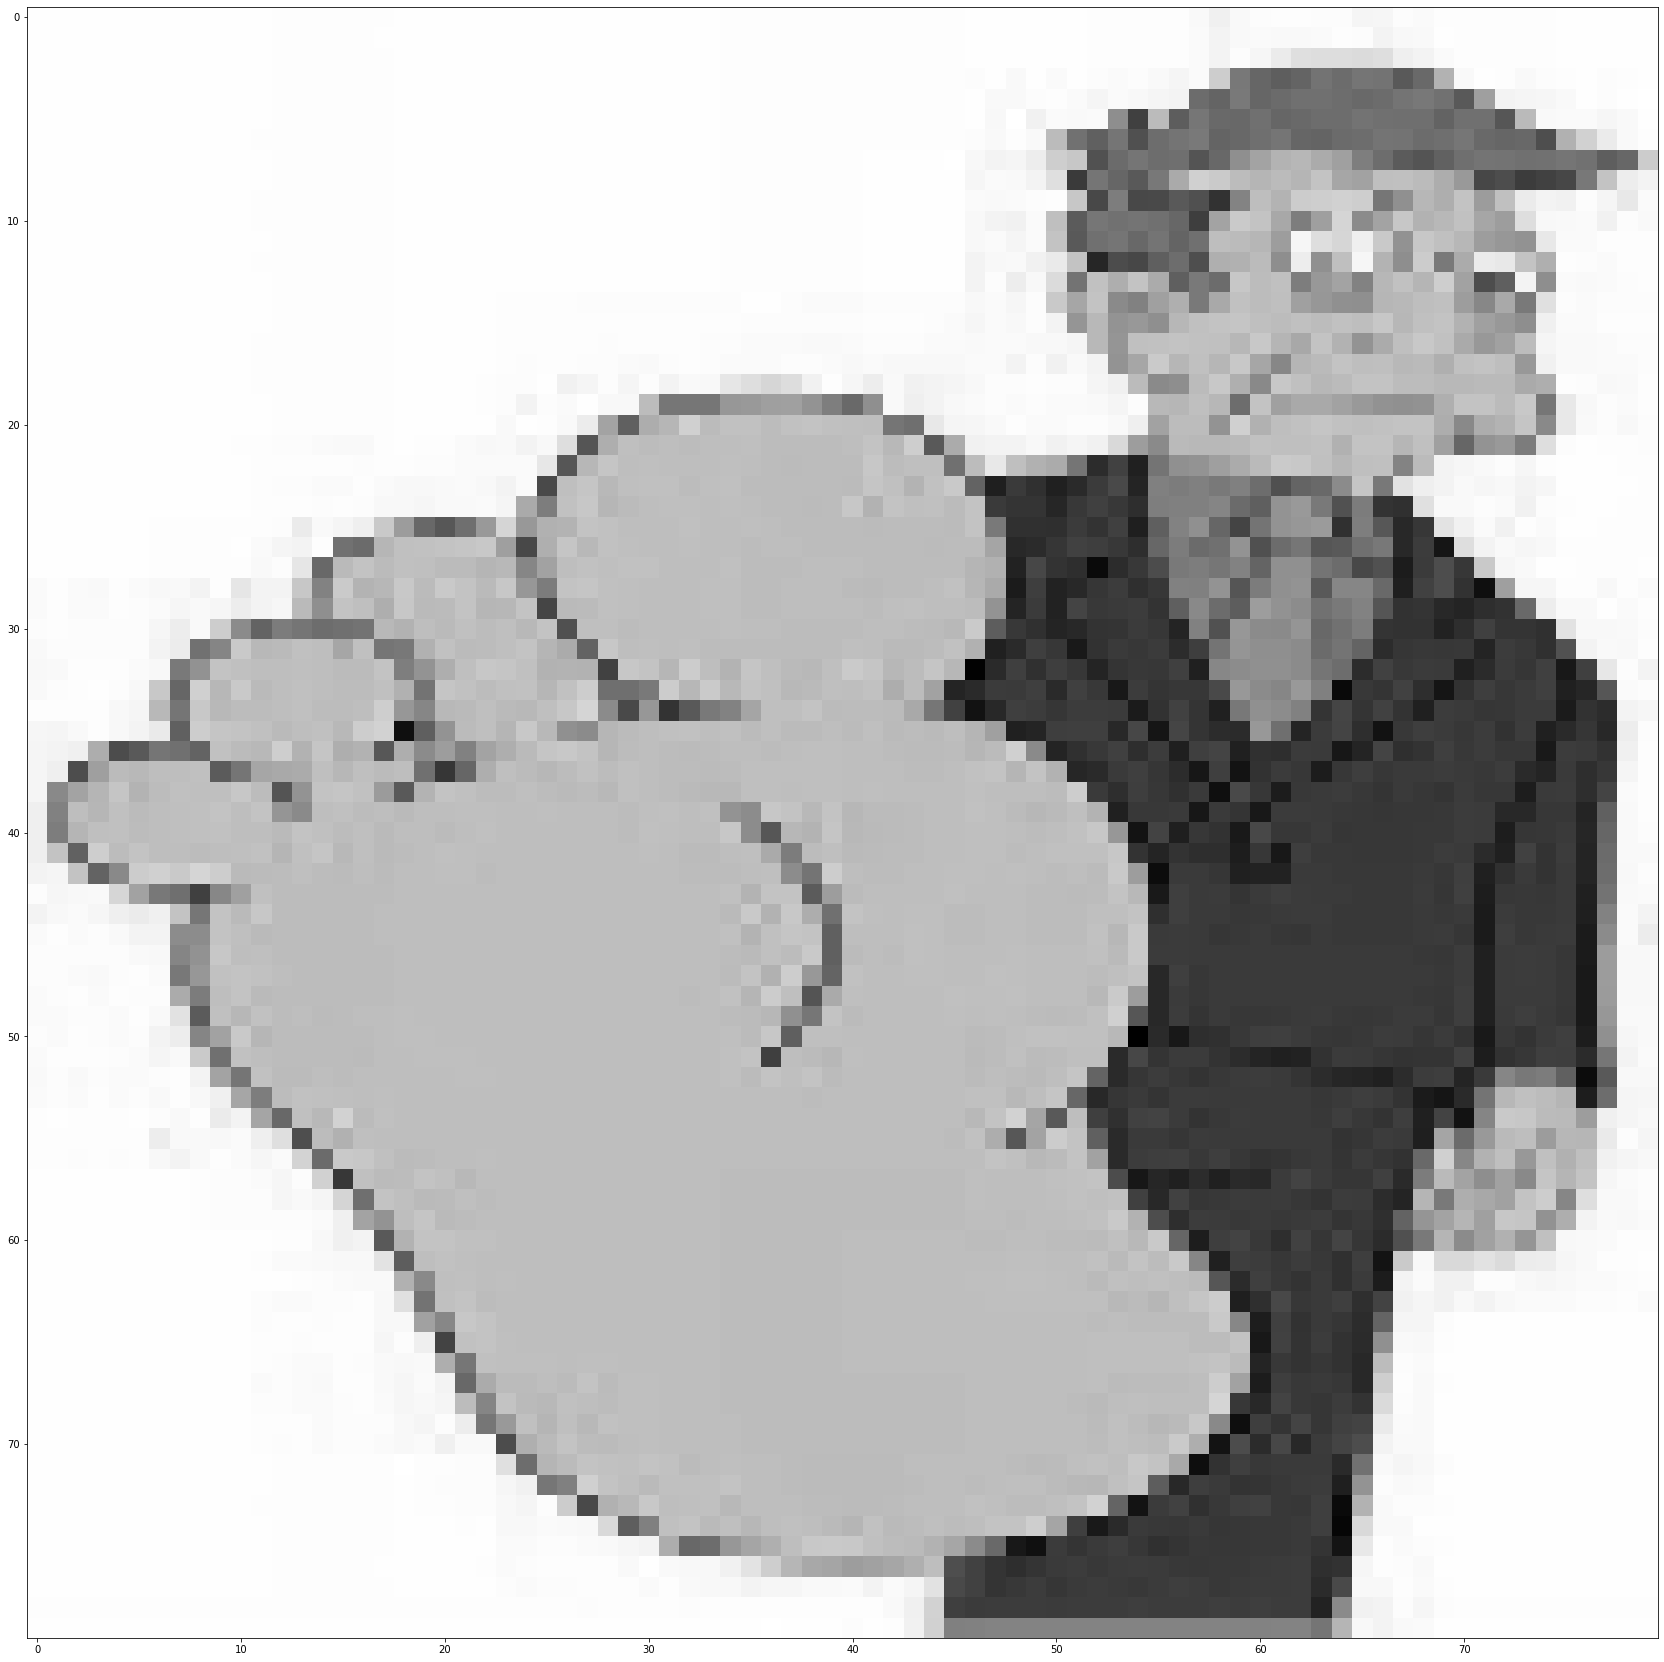

In [9]:
# Visualizing the data (OpenCV doesn't display well in Jupyter notebooks)
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
plt.imshow(train[0][0], cmap='gray')
plt.show()

In [10]:
# Separating the array and corresponding labels
featureSet, labels = caer.sep_train(train, IMG_SIZE=IMG_SIZE)

In [11]:
from tensorflow.keras.utils import to_categorical

# Normalize the featureSet ==> (0,1)
featureSet = caer.normalize(featureSet)
# Converting numerical labels to binary class vectors
labels = to_categorical(labels, len(characters))

In [13]:
from sklearn.model_selection import train_test_split
# Creating train and validation data
split_data = train_test_split(featureSet, labels, test_size=0.2)
x_train, x_val, y_train, y_val = (np.array(item) for item in split_data)

In [15]:
del train
del featureSet
del labels 
gc.collect()

NameError: name 'train' is not defined

In [16]:

# Useful variables when training
BATCH_SIZE = 32
EPOCHS = 13

In [17]:
# Image data generator (introduces randomness in network ==> better accuracy)
datagen = canaro.generators.imageDataGenerator()
train_gen = datagen.flow(x_train, y_train, batch_size=BATCH_SIZE)

In [18]:
# Create our model
model = canaro.models.createSimpsonsModel(IMG_SIZE=IMG_SIZE, channels=channels, output_dim=len(characters), 
                                         loss='binary_crossentropy', decay=1e-7, learning_rate=0.001, momentum=0.9,
                                         nesterov=True)

##### (OPTIONAL) If you solely want the model architecture, go to <https://github.com/jasmcaus/canaro/blob/master/canaro/models/simpsons.py> 
# and then uncomment the following to compile the model

# # Compiling the model
# from tensorflow.keras.optimizers import SGD
# optimizer = SGD(lr=0.001, decay=1e-8, momentum=.9, nesterov=True)
# model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 80, 80, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 78, 78, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 39, 39, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 39, 39, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 39, 39, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 37, 37, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 18, 18, 64)       

In [20]:
# Training the model

from tensorflow.keras.callbacks import LearningRateScheduler
callbacks_list = [LearningRateScheduler(canaro.lr_schedule)]
training = model.fit(train_gen,
                    steps_per_epoch=len(x_train)//BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=(x_val,y_val),
                    validation_steps=len(y_val)//BATCH_SIZE,
                    callbacks = callbacks_list)

Epoch 1/10
345/345 [==============================] - 14s 29ms/step - loss: 0.3960 - accuracy: 0.1378 - val_loss: 0.3339 - val_accuracy: 0.1571
Epoch 2/10
345/345 [==============================] - 9s 27ms/step - loss: 0.3238 - accuracy: 0.1640
Epoch 3/10
345/345 [==============================] - 10s 28ms/step - loss: 0.3240 - accuracy: 0.1593
Epoch 4/10
345/345 [==============================] - 9s 25ms/step - loss: 0.3232 - accuracy: 0.1566
Epoch 5/10
345/345 [==============================] - 9s 26ms/step - loss: 0.3189 - accuracy: 0.1787
Epoch 6/10
345/345 [==============================] - 10s 28ms/step - loss: 0.3084 - accuracy: 0.2276
Epoch 7/10
345/345 [==============================] - 9s 26ms/step - loss: 0.3034 - accuracy: 0.2471
Epoch 8/10
345/345 [==============================] - 9s 26ms/step - loss: 0.3018 - accuracy: 0.2527
Epoch 9/10
345/345 [==============================] - 9s 26ms/step - loss: 0.2991 - accuracy: 0.2693
Epoch 10/10
345/345 [=========================

In [21]:
characters

['homer_simpson',
 'ned_flanders',
 'moe_szyslak',
 'lisa_simpson',
 'bart_simpson',
 'marge_simpson',
 'krusty_the_clown',
 'principal_skinner',
 'charles_montgomery_burns',
 'milhouse_van_houten']

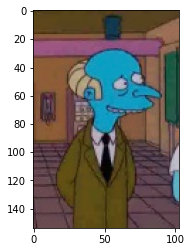

In [22]:
test_path = r'../input/the-simpsons-characters-dataset/kaggle_simpson_testset/kaggle_simpson_testset/charles_montgomery_burns_0.jpg'

img = cv.imread(test_path)

plt.imshow(img)
plt.show()

In [24]:
def prepare(image):
    image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    image = cv.resize(image, IMG_SIZE)
    image = caer.reshape(image, IMG_SIZE, 1)
    return image

In [26]:
predictions = model.predict(prepare(img))

In [29]:
# Getting class with the highest probability
print(characters[np.argmax(predictions[0])])

lisa_simpson
